# Properties of Probability Estimation

### Objective
The objective is to investigate the properties of a probability estimation, specifically focusing on the approximation of the probability of a binary event.

## 1. Unbiasedness & Consistency
#### Unbiasedness
An estimator is unbiased if, on average, it provides estimates that are equal to the true parameter
value. Mathematically, this means that the expected value of the estimator is equal to the true
parameter.
#### Consistency
A consistent estimator converges to the true parameter value as the sample size increases. In other
words, as more data points are included in the estimation process, the estimator becomes more
accurate.

## 2. The estimator used
Since the mean of 1000 probability estimates is 0.69675 (the true probability is 0.7). Those numbers are extremly close, hence the estimator is **unbiased**.

As the sample size increases, the estimated probability converges to 0.7 getting very closely at the threshold 10 000 for sample size, which serves as an evidence that this estimator is in fact **consistent**.


In [55]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
np.random.seed(24)

In [56]:
### Simulation Model Setup
p = 0.7  # Probability of success
n_trials_list = [10, 50, 100, 500, 1000, 5000, 10000]  # Different sample sizes for consistency check
M = 1000  # Number of estimates for unbiasedness check

In [57]:
### Function to simulate binary events and calculate empirical probability

def simulate_binomial_events(p, n):
    random_values = np.random.uniform(0, 1, n)
    binary_results = (random_values < p).astype(int)
    empirical_prob = np.mean(binary_results)
    return empirical_prob

In [58]:
### Calculate empirical probability

empirical_probs = [simulate_binomial_events(p, n) for n in n_trials_list]
print(f"Empirical probabilities for different sample sizes: {empirical_probs}")

Empirical probabilities for different sample sizes: [0.6, 0.62, 0.73, 0.71, 0.704, 0.7014, 0.7025]


# Unbiasedness

In [59]:
### Unbiasedness Check

unbiasedness_check_results = [simulate_binomial_events(p, 100) for _ in range(M)]
mean_estimate = np.mean(unbiasedness_check_results)
print(f"Mean of {M} probability estimates: {mean_estimate}")
print(f"True probability: {p}")

Mean of 1000 probability estimates: 0.69675
True probability: 0.7


Since the mean of 1000 probability estimates is 0.69675 (the true probability is 0.7). Those numbers are extremly close, hence the estimator is **unbiased**.

---

# Consistency

In [60]:
### Consistency Check

consistency_results = []
for n in n_trials_list:
    consistency_estimates = [simulate_binomial_events(p, n) for _ in range(M)]
    consistency_mean = np.mean(consistency_estimates)
    consistency_results.append(consistency_mean)

print("The means of subsequent samples:")
consistency_results

The means of subsequent samples:


[0.6995999999999999,
 0.69996,
 0.7031199999999999,
 0.699668,
 0.6994770000000001,
 0.6997136,
 0.7000002999999999]

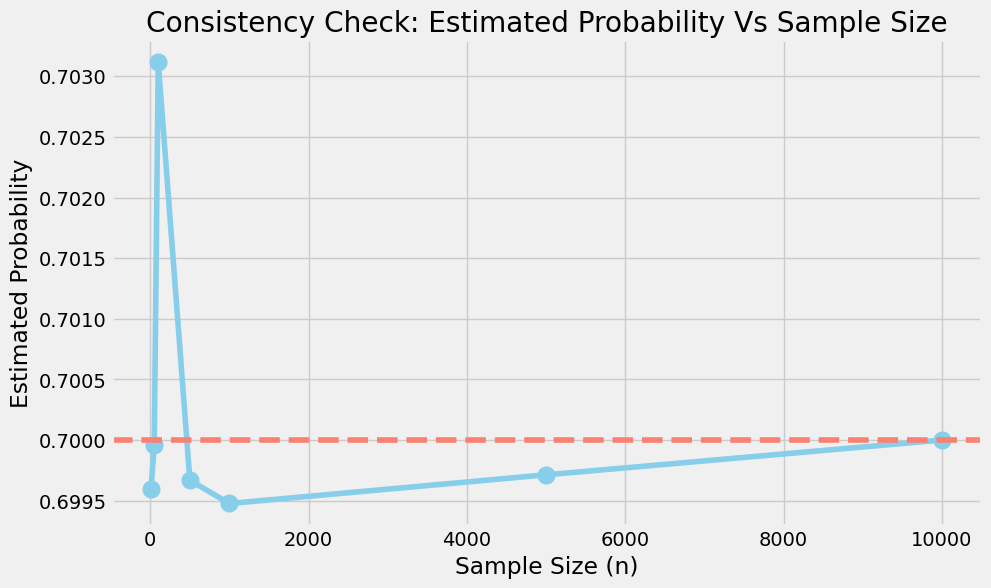

In [61]:
### Consistency check results

plt.figure(figsize=(10, 6))
plt.plot(n_trials_list, consistency_results, marker='o', color="skyblue", markersize=12)
plt.axhline(y=p, color='salmon', linestyle='--', linewidth=4)
plt.xlabel('Sample Size (n)')
plt.ylabel('Estimated Probability')
plt.title('Consistency Check: Estimated Probability Vs Sample Size')
plt.show()

As the sample size increases, the estimated probability converges to 0.7 getting very closely at the threshold 10 000 for sample size, which serves as an evidence that this estimator is in fact **consistent**.